# Very naive learning on the vector of surrounding bases with standardish machine learning algorithms from scikit sklearn

---


### Data

Naive feature vectors. The original sequence of any data points does not overlap.


### Analysis

I will try to naively predict the mehtylation value (0,1) based on naive sequence context feauture vectors.

I will use the "state of the art" general machine learning tools.
- AdaBoost
- RandomForest
- Gradient boosted trees
- SVM


### Conlcusions

- All naive models produce 70-77% prediction rates.
    - actually I think that's surprisinlgy high 
    
    
- Interesting position importance figure with Random Forest.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import time

from sklearn import tree
from sklearn import svm
from sklearn import ensemble

import sys
sys.path.append('../my_modules')
from loading_utils import read_my_data,create_sets

import os,subprocess
workdir='/nagyvinyok/adat84/sotejedlik/ribli/methylation_code/modelling'
subprocess.call(['mkdir',workdir])
os.chdir(workdir)

### Load data

In [2]:
x,y = read_my_data(fname='../prepare_data/meth_feat_vect.csv')

Loading data... 


In [3]:
def test_sklearn_model(model,train_x,train_y,test_x,test_y):
    start=time.time()
    model=model.fit(train_x,train_y)
    print 'train score:',list((model.predict(train_x)==train_y)).count(True)/float(len(train_y))
    print 'test score:',list((model.predict(test_x)==test_y)).count(True)/float(len(test_y))
    print 'It took:',time.time()-start

## AdaBoost

- learning rate / n_estimators can be tuned
- more estimators -> better result, and slower

In [4]:
(train_x,train_y),(valid_x,valid_y),(test_x,test_y)= create_sets(
    x,y,N_train=5000,N_valid=5000,N_test=5000,length=1000)

adab = ensemble.AdaBoostClassifier(n_estimators=100)
test_sklearn_model(adab,train_x,train_y,test_x,test_y)

train score: 0.7634
test score: 0.684
It took: 17.0712611675


- It gets a bit better using more data

In [5]:
(train_x,train_y),(valid_x,valid_y),(test_x,test_y)= create_sets(
    x,y,N_train=50000,N_valid=0,N_test=10000,length=1000)

adab = ensemble.AdaBoostClassifier(n_estimators=100)
test_sklearn_model(adab,train_x,train_y,test_x,test_y)

train score: 0.7238
test score: 0.7141
It took: 223.738124847


- Its already quite slow, but maybe I could test with more estimators

In [9]:
(train_x,train_y),(valid_x,valid_y),(test_x,test_y)= create_sets(
    x,y,N_train=50000,N_valid=0,N_test=10000,length=1000)

adab = ensemble.AdaBoostClassifier(n_estimators=1000)
test_sklearn_model(adab,train_x,train_y,test_x,test_y)

train score: 0.76624
test score: 0.7465
It took: 2233.277565


---

## Random Forest

- n_estimators can be tuned
- the characteristics of the decision trees can be also tuned (min_samples_split)

In [7]:
(train_x,train_y),(valid_x,valid_y),(test_x,test_y)= create_sets(
    x,y,N_train=50000,N_valid=0,N_test=10000,length=1000)

rf = ensemble.RandomForestClassifier(n_estimators=100,min_samples_split=100)
test_sklearn_model(rf,train_x,train_y,test_x,test_y)

train score: 0.87824
test score: 0.7362
It took: 57.7739651203


- With more estimators:

In [4]:
(train_x,train_y),(valid_x,valid_y),(test_x,test_y)= create_sets(
    x,y,N_train=50000,N_valid=0,N_test=10000,length=1000)

rf = ensemble.RandomForestClassifier(n_estimators=1000,min_samples_split=100)
test_sklearn_model(rf,train_x,train_y,test_x,test_y)

train score: 0.88678
test score: 0.7378
It took: 506.190218925


---

## Gradient boosted trees
- max depth, and n_estimators can be tuned

In [7]:
(train_x,train_y),(valid_x,valid_y),(test_x,test_y)= create_sets(
    x,y,N_train=5000,N_valid=5000,N_test=5000,length=1000)

gbc = ensemble.GradientBoostingClassifier(max_depth=3,n_estimators=100)
test_sklearn_model(gbc,train_x,train_y,test_x,test_y)

train score: 0.8724
test score: 0.7236
It took: 61.5076990128


- with more data

In [9]:
(train_x,train_y),(valid_x,valid_y),(test_x,test_y)= create_sets(
    x,y,N_train=50000,N_valid=0,N_test=10000,length=1000)

gbc = ensemble.GradientBoostingClassifier(max_depth=4,n_estimators=100)
test_sklearn_model(gbc,train_x,train_y,test_x,test_y)

train score: 0.78638
test score: 0.7664
It took: 1131.56953001


---

## Support vector machine

- rbf kernel

- Error penalty can be tuned

- Note it's impossible to interrupt the python kernel when it's running

In [8]:
(train_x,train_y),(valid_x,valid_y),(test_x,test_y)= create_sets(
    x,y,N_train=5000,N_valid=5000,N_test=5000,length=1000)

rbf_svm = svm.SVC(kernel='rbf',C=0.3)
test_sklearn_model(rbf_svm,train_x,train_y,test_x,test_y)

train score: 0.8054
test score: 0.6982
It took: 77.9488670826


- With more data (really slow)

In [8]:
(train_x,train_y),(valid_x,valid_y),(test_x,test_y)= create_sets(
    x,y,N_train=50000,N_valid=0,N_test=10000,length=1000)

rbf_svm = svm.SVC(kernel='rbf',C=0.3)
test_sklearn_model(rbf_svm,train_x,train_y,test_x,test_y)

train score: 0.7856
test score: 0.707
It took: 6971.13000917


---
## Feature importance with Random Forest

- Very strong asymmetry !

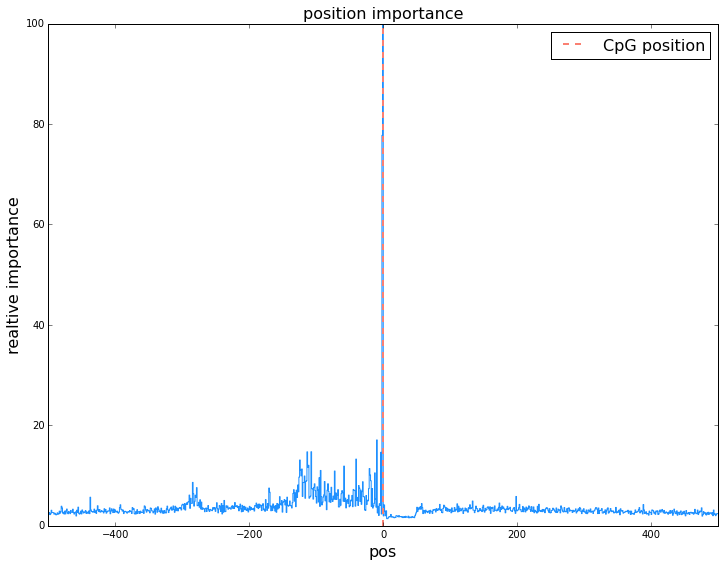

In [7]:
(train_x,train_y),(valid_x,valid_y),(test_x,test_y)= create_sets(
    x,y,N_train=60000,N_valid=0,N_test=0,length=1000)

rf = ensemble.RandomForestClassifier(n_estimators=5000,min_samples_split=100,n_jobs=12)
model=rf.fit(train_x,train_y)
feature_importance = model.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())

fig,ax=plt.subplots()
fig.set_size_inches(12,9)
ax.step(np.arange(len(feature_importance))-500, feature_importance,lw=1,c='dodgerblue')
ax.axvline(0,lw=2,linestyle='dashed',c='salmon',label='CpG position')
ax.set_ylabel('realtive importance',fontsize=16)
ax.set_xlabel('pos',fontsize=16)
ax.set_xlim(-500,500)
ax.legend(fontsize=16)
dump=ax.set_title('position importance',fontsize=16)

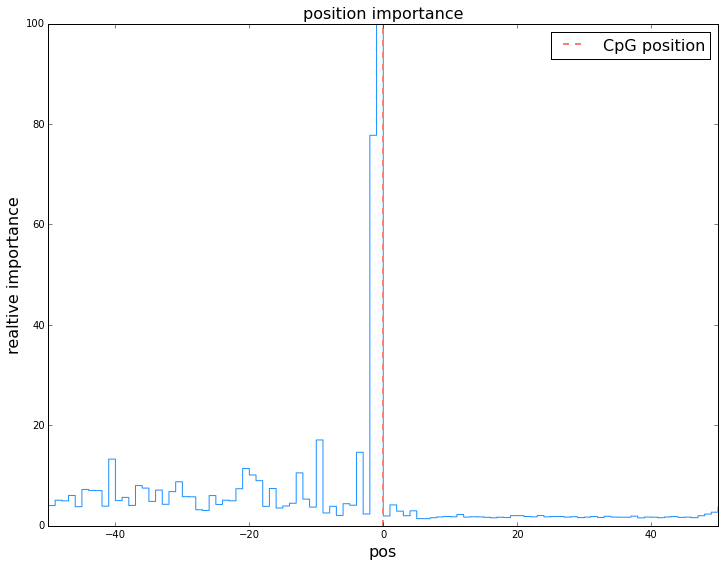

In [8]:
fig,ax=plt.subplots()
fig.set_size_inches(12,9)
ax.step(np.arange(len(feature_importance))-500, feature_importance,lw=1,c='dodgerblue')
ax.axvline(0,lw=2,linestyle='dashed',c='salmon',label='CpG position')
ax.set_ylabel('realtive importance',fontsize=16)
ax.set_xlabel('pos',fontsize=16)
ax.set_xlim(-50,50)
ax.legend(fontsize=16)
dump=ax.set_title('position importance',fontsize=16)

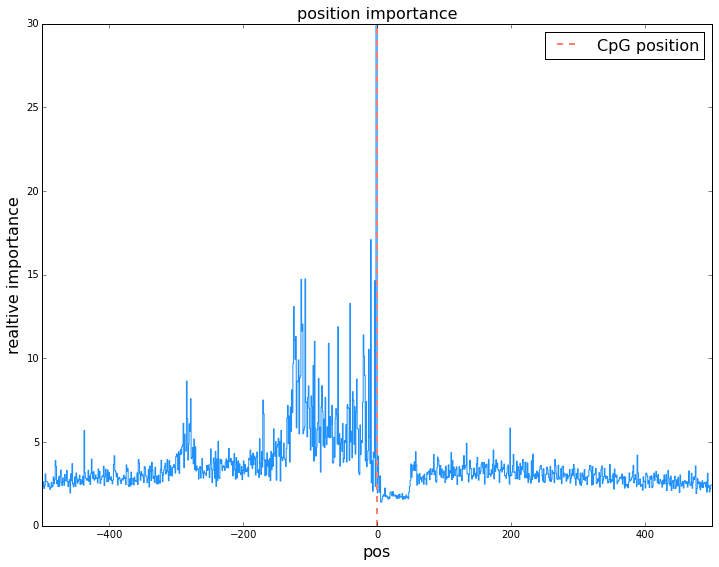

In [9]:
fig,ax=plt.subplots()
fig.set_size_inches(12,9)
ax.step(np.arange(len(feature_importance))-500, feature_importance,lw=1,c='dodgerblue')
ax.axvline(0,lw=2,linestyle='dashed',c='salmon',label='CpG position')
ax.set_ylabel('realtive importance',fontsize=16)
ax.set_xlabel('pos',fontsize=16)
ax.set_xlim(-500,500)
ax.set_ylim(0,30)
ax.legend(fontsize=16)
dump=ax.set_title('position importance',fontsize=16)